# Assignment No : 8


# Data Visualization I

#### Venkatesh Jamge  (31135)

#### 1. Use the inbuilt dataset 'titanic'. The dataset contains 891 rows and contains information about the passengers who boarded the unfortunate Titanic ship. Use the Seaborn library to see if we can find any patterns in the data.
#### 2. Write a code to check how the price of the ticket (column name: 'fare') for each passenger is distributed by plotting a histogram.

In [1]:
# importing the Header files

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Loading the dataset and displaying first 5 rows of the dataset

data = pd.read_csv("train.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Finding if there exists any null values in the dataset

data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
# Replacing the NA values with the mean values of the Age column

data['Age'].fillna(data['Age'].mean(), inplace = True)

In [5]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

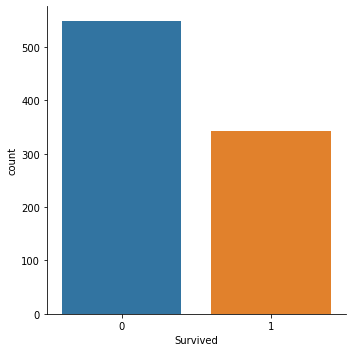

In [7]:
# Displaying the count of passengers survived and not survived
# Observation : Death rate is more than survival rate
sns.catplot(x="Survived",kind = "count", data = data)

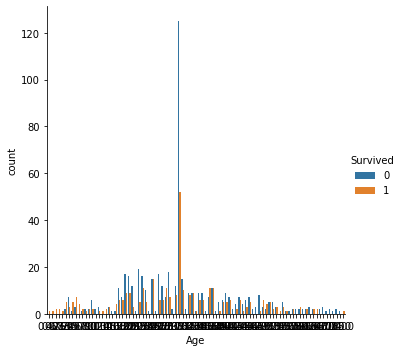

In [8]:
# Passengers survived according to the age
sns.catplot(x = "Age", hue = "Survived", kind = "count", data = data)

In [9]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

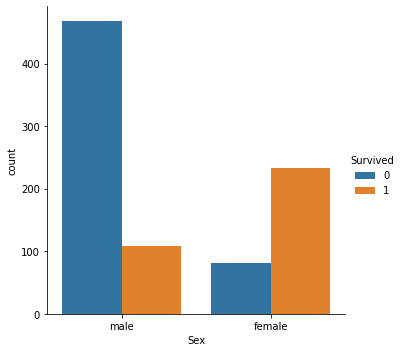

In [10]:
# Male and Female Passengers survived and not survived using catplot
# observation : death ration of male passengers is more than death ratio of female passengers
sns.catplot(x ="Sex", hue ="Survived", kind ="count", data = data)

<AxesSubplot:xlabel='Survived', ylabel='Pclass'>

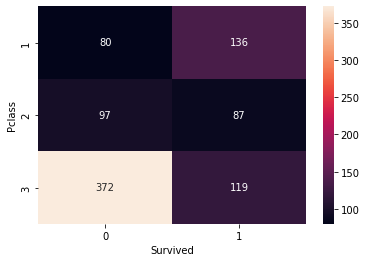

In [11]:
# Heatmap to display the passengers that are survived by considering the Pclass
# Observation : survival rate of 1st class is more and death rate of 3rd class is more
group = data.groupby(['Pclass', 'Survived'])
pclass_survived = group.size().unstack()

sns.heatmap(pclass_survived, annot = True, fmt ="d")

<AxesSubplot:>

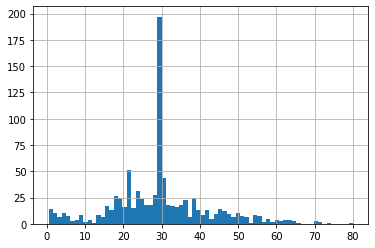

In [12]:
# Histogram to display Age of the passengers boarded on the titanic
# observation : young age people were more than old people on the ship
# observation : 25 to 30 age people were more on the ship
data['Age'].hist(bins=70)

In [13]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


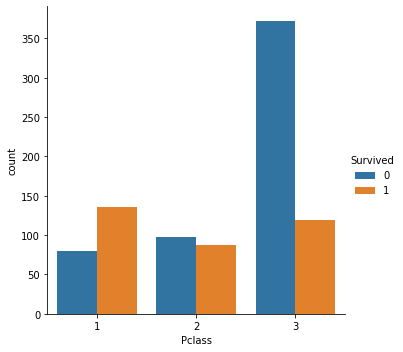

In [14]:
# Catplot to plot the survived passengers by considering the Pclass of the passengers
# obvservaion : death rate of 3rd class passengers is more 
sns.catplot(x ="Pclass", hue ="Survived", kind ="count", data = data)

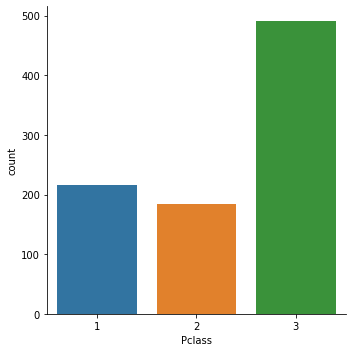

In [15]:
# Catplot for count of passengers of Pclass 1 2 and 3
# observation : more 3rd class passengers were on the ship than 2nd and 1st class passengers
sns.catplot(x ="Pclass", kind ="count", data = data)

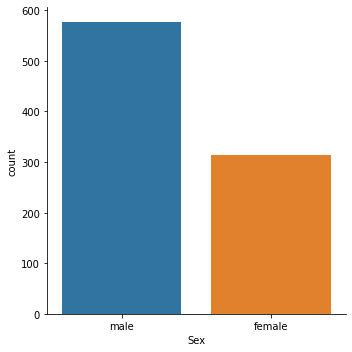

In [16]:
# catplot to display count of passengers (male and female)
# observsation : more male passengers were present than female passengers
tsns.catplot(x = "Sex", kind = "count" , data = data)

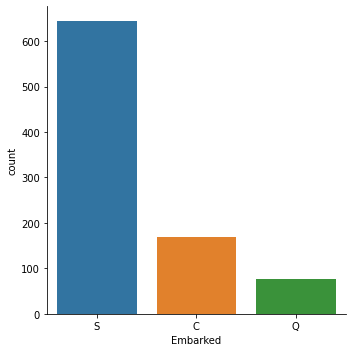

In [17]:
sns.catplot(x= "Embarked" , kind ='count', data = data)

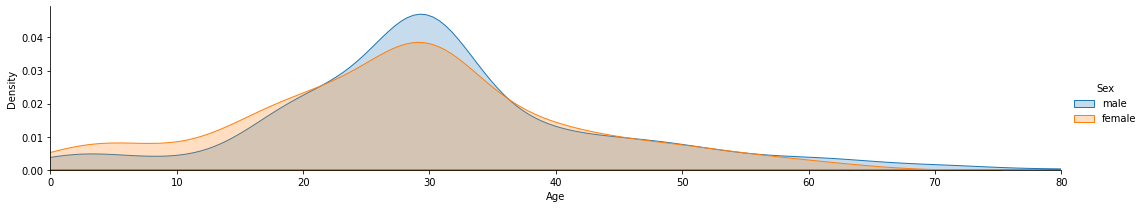

In [18]:
as_fig = sns.FacetGrid(data,hue='Sex',aspect=5)
as_fig.map(sns.kdeplot,'Age',shade=True)
oldest = data['Age'].max()
as_fig.set(xlim=(0,oldest))
as_fig.add_legend()

#observation : more people of age group 20 to 30 were present on the ship

In [19]:
# as_fig1 = sns.FacetGrid(data,hue='Pclass',aspect=5)
# as_fig1.map(sns.kdeplot,'Survived',shade=True)
# maxi = data['Survived'].max()
# as_fig1.set(xlim=(0,maxi))
# as_fig1.add_legend()

/home/pict/.local/lib/python3.8/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/home/pict/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


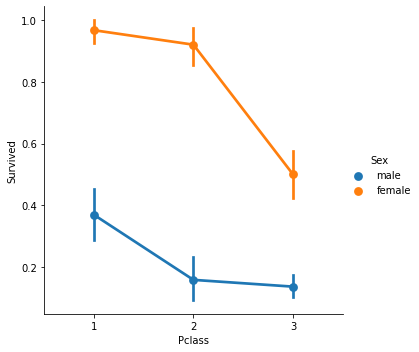

In [20]:
sns.factorplot('Pclass','Survived',data=data,hue='Sex')

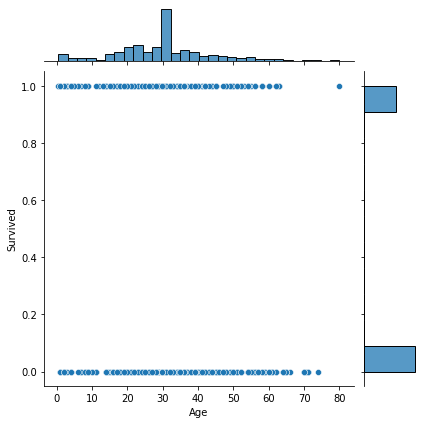

In [21]:
sns.jointplot(data = data, y = "Survived", x = "Age")

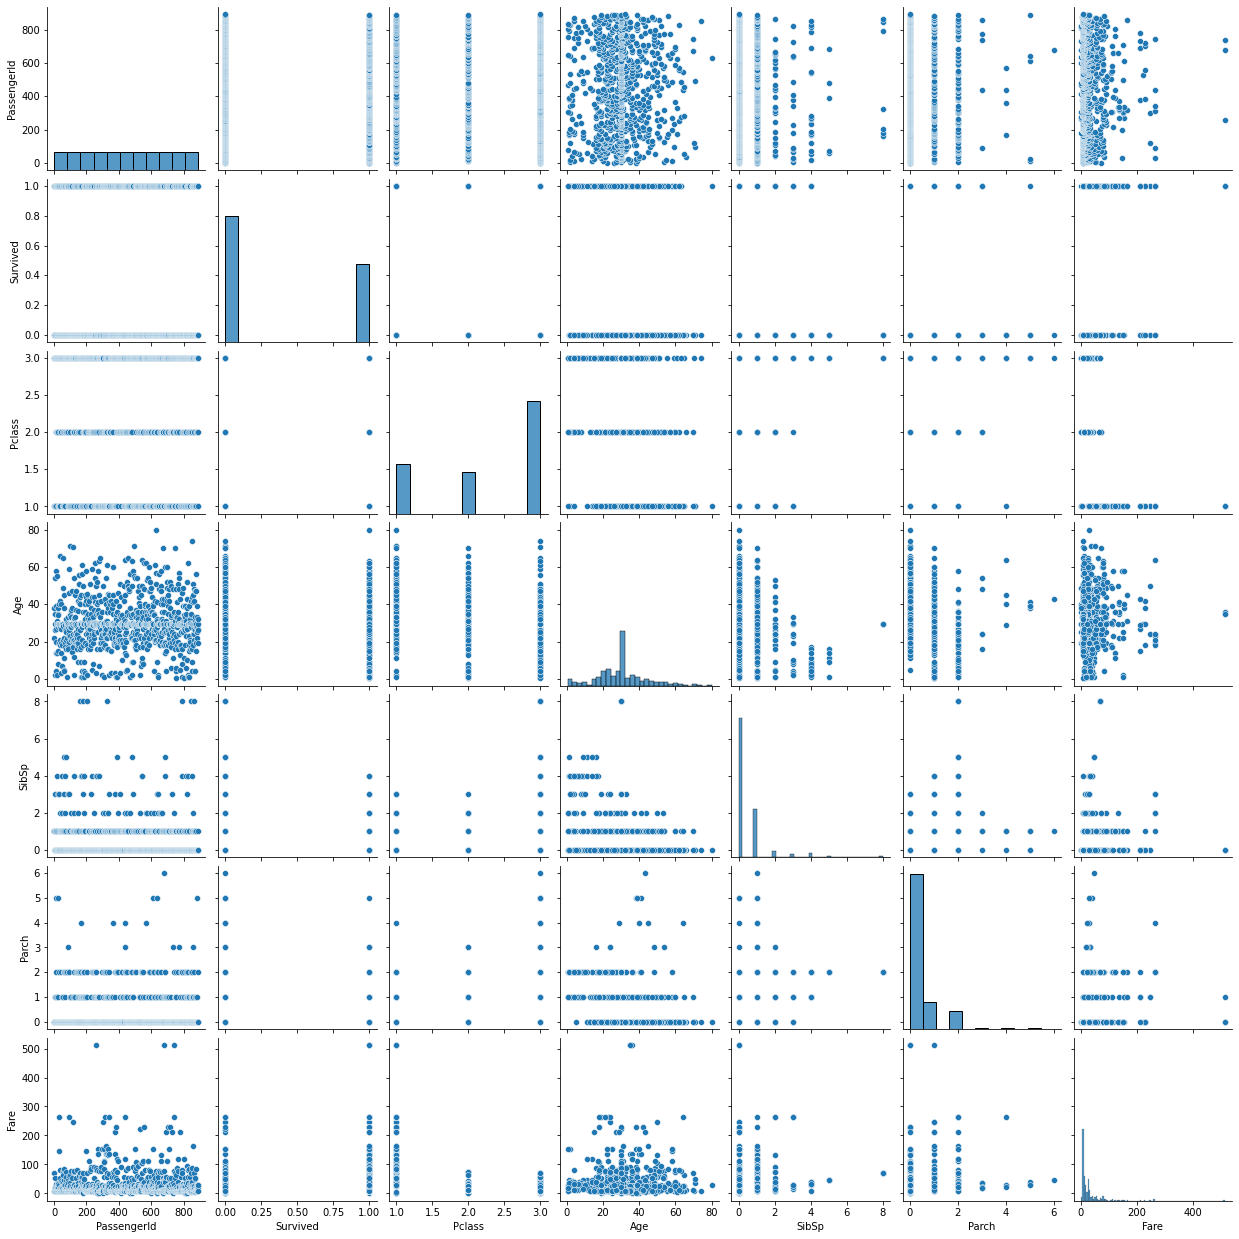

In [30]:
sns.pairplot(data = data)

<AxesSubplot:xlabel='Survived', ylabel='Age'>

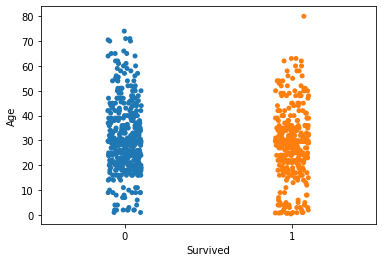

In [23]:
# stripplot for relation between age and survived

sns.stripplot(data = data, y = "Age", x = "Survived")

In [24]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [25]:
# sns.jointplot(y="Survived", x="Age", data=data,
#                   kind="reg", truncate=False,
#                   xlim=(0, 60), ylim=(0, 12),
#                   color="m", height=7)

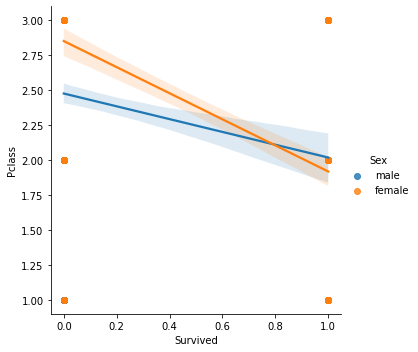

In [26]:
sns.lmplot(x="Survived", y="Pclass", data=data, hue = "Sex")

#### 2. Write a code to check how the price of the ticket (column name: 'fare') for each passenger is distributed by plotting a histogram.

In [27]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

<AxesSubplot:>

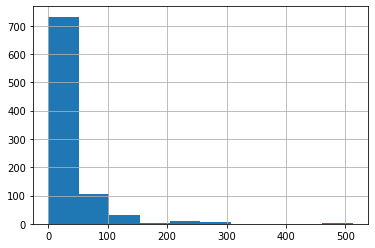

In [28]:
# histogram for fare / price of passenger tickets
# observation : passengers with fare 0 to 100 is more on the ship
data['Fare'].hist(bins = 10)

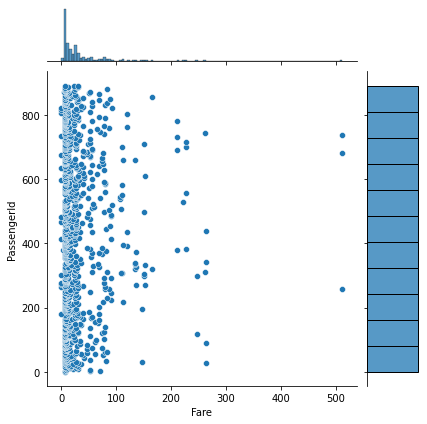

In [29]:
sns.jointplot(data = data, y = "PassengerId", x = "Fare")

In [31]:
# Observations : 
# 1. Female survival rate is more than male survival rate
# 2. 1st class passengers survived more than 2nd and 3rd class passengers
# 3. More young people were on the ship